<a href="https://colab.research.google.com/github/FilippMaksimov/SPSU.DynamicSystems/blob/main/DynSys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#Params from Table 1
S0 = 0.5
K = 0.6
r = 0.1
sigma = 0.3
T = 1
delta = 1 / 1000
num_paths = 100
time_steps = 1000

#Geometric Brownian Motion
def simulate_gbm(S0, r, sigma, T, num_paths, time_steps):
  np.random.seed(42)
  dt = T / time_steps
  S = np.zeros((num_paths, time_steps + 1))
  S[:, 0] = S0
  for t in range(1, time_steps + 1):
    z = np.random.normal(0, 0.3, num_paths)
    S[:, t] = S[:, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma*np.sqrt(dt) * z)
  return S

#Calc call option prices
def calculate_call_option(S, K, r, T, delta):
  noise = np.random.uniform(0, 0.3)
  C = np.zeros(S.shape)
  d1 = np.log(S / K) + (r + 0.5 * sigma**2) * (T / (sigma * np.sqrt(T)))
  d2 = d1 - sigma * np.sqrt(T)
  C = S * np.exp(-delta * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2) + noise
  return C

In [ ]:
#Main simulation
S = simulate_gbm(S0, r, sigma, T, num_paths, time_steps)
C = calculate_call_option(S, K, r, T, delta)

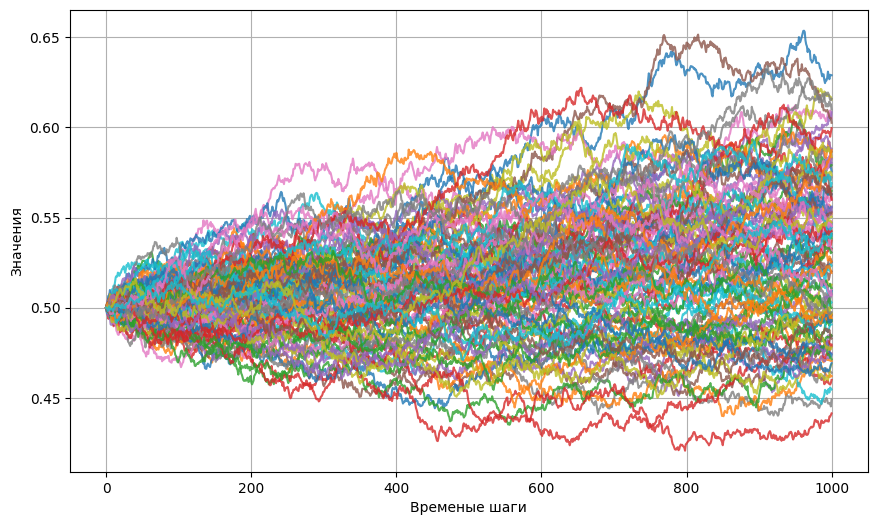

In [ ]:
plt.figure(figsize=(35, 6))

plt.subplot(1, 3, 1)
for i in range(num_paths):
  plt.plot(S[i], alpha=0.8)
plt.xlabel('Временые шаги')
plt.ylabel('Значения')
plt.grid()

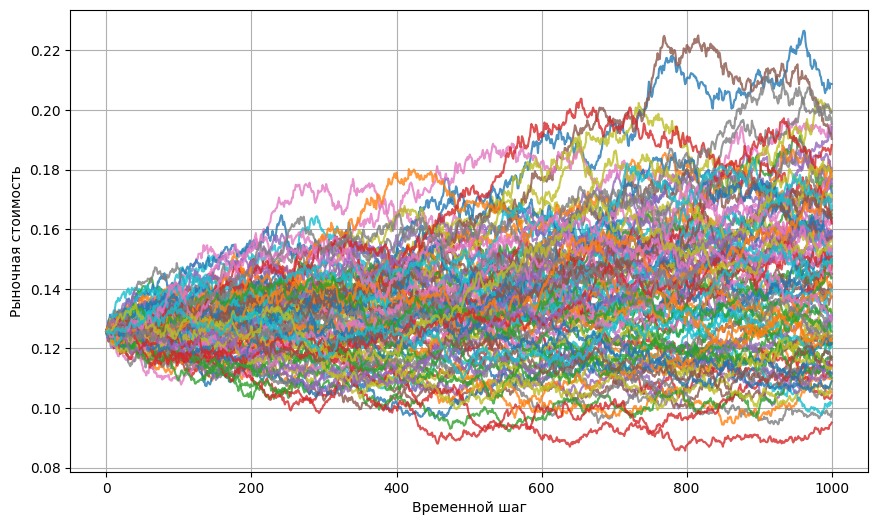

In [ ]:
plt.figure(figsize=(35, 6))

plt.subplot(1, 3, 2)
for i in range(num_paths):
  plt.plot(C[i], alpha=0.8)
plt.xlabel('Временной шаг')
plt.ylabel('Рыночная стоимость')
plt.grid()

In [ ]:
# Параметры модели
dt = 0.01  # шаг по времени
dx = 0.1   # шаг по пространству
p = 10     # количество точек по пространству
m = 100    # количество шагов по времени

# Функции для вычисления коэффициентов
def mu(t, x):
    return 0.1  # пример значения для коэффициента mu

def sigma(t, x):
    return 0.2  # пример значения для коэффициента sigma

def r(t, x):
    return 0.05  # пример значения для коэффициента r

def f(t, x):
    return 0.1  # пример значения для функции f

In [ ]:
# Дискретизация коэффициентов a_i, b_i, c_i
def calculate_coefficients(t, x):
    a_i = dt * (0.5 * sigma(t, x) / dx**2 - mu(t, x) / (2 * dx))
    b_i = dt * (1 + f(t, x) / x - sigma(t, x) / dx**2 - r(t, x))
    c_i = dt * (0.5 * sigma(t, x) / dx**2 + mu(t, x) / (2 * dx))
    return a_i, b_i, c_i

In [ ]:
def update_values(y, a, b, c):
    # Обновление значений для всех i
    y_new = np.zeros_like(y)
    for i in range(1, len(y) - 1):
        y_new[i] = a[i] * y[i-1] + b[i] * y[i] + c[i] * y[i+1]
    return y_new

In [ ]:
# Функция стоимости
def cost_function(y, y_next, a, b, c):
    cost = 0
    for i in range(1, len(y) - 1):
        cost += (a[i] * y[i-1] + b[i] * y[i] + c[i] * y[i+1] - y_next[i]) ** 2
    return 0.5 * cost

# Градиент функции стоимости
def gradient(y, y_next, a, b, c):
    grad_a = np.zeros_like(a)
    grad_b = np.zeros_like(b)
    grad_c = np.zeros_like(c)

    for i in range(1, len(y) - 1):
        grad_a[i] = 2 * (a[i] * y[i-1] + b[i] * y[i] + c[i] * y[i+1] - y_next[i]) * y[i-1]
        grad_b[i] = 2 * (a[i] * y[i-1] + b[i] * y[i] + c[i] * y[i+1] - y_next[i]) * y[i]
        grad_c[i] = 2 * (a[i] * y[i-1] + b[i] * y[i] + c[i] * y[i+1] - y_next[i]) * y[i+1]

    return grad_a, grad_b, grad_c

# Метод градиентного спуска
def gradient_descent(y, y_next, a, b, c, learning_rate=0.01, iterations=100):
    for _ in range(iterations):
        grad_a, grad_b, grad_c = gradient(y, y_next, a, b, c)

        a -= learning_rate * grad_a
        b -= learning_rate * grad_b
        c -= learning_rate * grad_c

    return a, b, c

In [ ]:
# Инициализация данных
y = np.random.rand(p)  # начальные значения y
y_next = np.random.rand(p)  # следующие значения y (реальные данные для обучения)

# Инициализация коэффициентов
a, b, c = np.zeros(p), np.zeros(p), np.zeros(p)

# Моделирование
for k in range(m - 1):
    # Вычисление коэффициентов для текущего шага времени
    for i in range(1, p - 1):
        a_i, b_i, c_i = calculate_coefficients(k * dt, i * dx)
        a[i], b[i], c[i] = a_i, b_i, c_i

    # Обновление значений y
    y_next = update_values(y, a, b, c)
    # Минимизация функции стоимости
    a, b, c = gradient_descent(y, y_next, a, b, c)
    # Переход к следующему шагу
    y = y_next

print("Оптимизированные коэффициенты a:", a)
print("Оптимизированные коэффициенты b:", b)
print("Оптимизированные коэффициенты c:", c)

Оптимизированные коэффициенты a: [0.    0.095 0.095 0.095 0.095 0.095 0.095 0.095 0.095 0.   ]
Оптимизированные коэффициенты b: [ 0.         -0.1805     -0.1855     -0.18716667 -0.188      -0.1885
 -0.18883333 -0.18907143 -0.18925     0.        ]
Оптимизированные коэффициенты c: [0.    0.105 0.105 0.105 0.105 0.105 0.105 0.105 0.105 0.   ]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Разделение данных на обучающие и тестовые
def cross_validate(S, C, train_size_list):
    results = []
    for train_size in train_size_list:
        # Разделяем данные
        X_train, X_test, y_train, y_test = train_test_split(S, C, train_size=train_size, shuffle=False)

        # Линейная регрессия
        model_lr = LinearRegression()
        model_lr.fit(X_train, y_train)
        y_pred_lr = model_lr.predict(X_test)
        mse_lr = mean_squared_error(y_test, y_pred_lr)

        # Нейронная сеть
        model_nn = MLPRegressor(hidden_layer_sizes=(20, 10), max_iter=500, random_state=42)
        model_nn.fit(X_train, y_train)
        y_pred_nn = model_nn.predict(X_test)
        mse_nn = mean_squared_error(y_test, y_pred_nn)

        # Вместо этого используем текущие данные как гипотетический прогноз
        y_pred_dyn_sys = y_train.mean() * np.ones_like(y_test)
        mse_dyn_sys = mean_squared_error(y_test, y_pred_dyn_sys)

        # Сохраняем результаты
        results.append([mse_lr, mse_nn, mse_dyn_sys])

    return results

# Объемы обучающих данных
train_size_list = [0.2, 0.4, 0.6, 0.8]

# Кросс-валидация
results = cross_validate(S, C, train_size_list)

# Печать результатов
for i, train_size in enumerate(train_size_list):
    print(f"Train size {train_size}: Linear Regression: {results[i][0]:.5f}, "
          f"Neural Network: {results[i][1]:.5f}, Dynamic System: {results[i][2]:.5f}")

Train size 0.2: Linear Regression: 0.00001, Neural Network: 0.00090, Dynamic System: 0.00043
Train size 0.4: Linear Regression: 0.00001, Neural Network: 0.00093, Dynamic System: 0.00043
Train size 0.6: Linear Regression: 0.00000, Neural Network: 0.00091, Dynamic System: 0.00044
Train size 0.8: Linear Regression: 0.00000, Neural Network: 0.00088, Dynamic System: 0.00038


In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Параметры опциона (из эксперимента 3.1)
S_0 = 100  # начальная цена актива
K = 100  # страйк
r = 0.05  # безрисковая ставка
sigma = 0.2  # волатильность
T = 1  # время до истечения (в годах)
delta = 0.01  # ставка дивиденда

# Генерация случайных траекторий для цены актива
n_steps = 1000  # количество шагов
time = np.linspace(0, T, n_steps)

# Генерация 1000 случайных траекторий
n_paths = 1000
S = np.zeros((n_paths, n_steps))
S[:, 0] = S_0

for t in range(1, n_steps):
    dt = time[t] - time[t-1]
    S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.normal(size=n_paths))

# Рассчитываем цену колл-опциона для каждого шага
d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * time) / (sigma * np.sqrt(time))
d2 = d1 - sigma * np.sqrt(time)
C_t = S * np.exp(-delta * time) * norm.cdf(d1) - K * np.exp(-r * time) * norm.cdf(d2)

# Разделение на обучающие и тестовые данные с помощью кросс-валидации
kf = KFold(n_splits=5, shuffle=True, random_state=42)
error_list = []

for train_index, test_index in kf.split(S):
    # Обучающие и тестовые данные
    S_train, S_test = S[train_index], S[test_index]
    C_train, C_test = C_t[train_index], C_t[test_index]

    # Дискретизация (по аналогии с разделом 2.2)
    m, p = S_train.shape
    y_k = C_train  # Целевые значения (цены опциона)

    # Функция для градиентного спуска
    def cost_function(a, b, c, y_k, Phi, Psi):
        J = 0
        for k in range(m-1):
            for i in range(1, p-1):
                prediction = a[i] * y_k[k, i-1] + b[i] * y_k[k, i] + c[i] * y_k[k, i+1]
                error = prediction - y_k[k+1, i]
                J += error**2
        return J / 2

    # Начальные коэффициенты для обучения
    a = np.random.rand(p)
    b = np.random.rand(p)
    c = np.random.rand(p)

    # Функция для вычисления градиентов
    def compute_gradients(a, b, c, y_k):
        gradients_a = np.zeros_like(a)
        gradients_b = np.zeros_like(b)
        gradients_c = np.zeros_like(c)

        for k in range(m-1):
            for i in range(1, p-1):
                prediction = a[i] * y_k[k, i-1] + b[i] * y_k[k, i] + c[i] * y_k[k, i+1]
                error = prediction - y_k[k+1, i]

                gradients_a[i] += error * y_k[k, i-1]
                gradients_b[i] += error * y_k[k, i]
                gradients_c[i] += error * y_k[k, i+1]

        return gradients_a, gradients_b, gradients_c

    # Алгоритм градиентного спуска с оптимизацией шага ODH
    max_iterations = 1000
    eta = 1e-6  # начальная скорость обучения

    for iteration in range(max_iterations):
        # Вычисление градиентов
        gradients_a, gradients_b, gradients_c = compute_gradients(a, b, c, y_k)

        # Оптимизация с шагом ODH
        r = np.random.rand(3, 3)  # случайная матрица для примера
        S = np.random.rand(3, 3)
        E = np.random.rand(3, 3)

        numerator = np.trace(r.T @ (E @ E.T @ S) @ E) + np.trace(S.T @ E)
        denominator = 3 + np.trace(S.T @ S)
        eta = numerator / denominator

        # Обновление коэффициентов
        a -= eta * gradients_a
        b -= eta * gradients_b
        c -= eta * gradients_c

        # Вычисление функции стоимости
        J = cost_function(a, b, c, y_k, None, None)

        # Условие остановки
        if J < 1e-6:
            print(f"Converged at iteration {iteration + 1}")
            break

        if iteration % 100 == 0:
            print(f"Iteration {iteration+1}, Cost: {J:.6f}")

    # Оценка модели
    C_pred = a[1:] * S_test[:, :-2] + b[1:] * S_test[:, 1:-1] + c[1:] * S_test[:, 2:]
    error = np.mean(np.abs(C_pred - C_test[:, 2:]))
    error_list.append(error)

# Итоговая ошибка
mean_error = np.mean(error_list)
print(f"Mean absolute error after cross-validation: {mean_error:.6f}")

<ipython-input-11-4f6d7986a6c3>:28: RuntimeWarning: invalid value encountered in divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * time) / (sigma * np.sqrt(time))


Iteration 1, Cost: nan


<ipython-input-11-4f6d7986a6c3>:52: RuntimeWarning: overflow encountered in scalar power
  J += error**2
<ipython-input-11-4f6d7986a6c3>:71: RuntimeWarning: overflow encountered in scalar add
  gradients_a[i] += error * y_k[k, i-1]
<ipython-input-11-4f6d7986a6c3>:72: RuntimeWarning: overflow encountered in scalar add
  gradients_b[i] += error * y_k[k, i]
<ipython-input-11-4f6d7986a6c3>:73: RuntimeWarning: overflow encountered in scalar add
  gradients_c[i] += error * y_k[k, i+1]
<ipython-input-11-4f6d7986a6c3>:71: RuntimeWarning: overflow encountered in scalar multiply
  gradients_a[i] += error * y_k[k, i-1]
<ipython-input-11-4f6d7986a6c3>:72: RuntimeWarning: overflow encountered in scalar multiply
  gradients_b[i] += error * y_k[k, i]
<ipython-input-11-4f6d7986a6c3>:73: RuntimeWarning: overflow encountered in scalar multiply
  gradients_c[i] += error * y_k[k, i+1]
<ipython-input-11-4f6d7986a6c3>:95: RuntimeWarning: overflow encountered in multiply
  a -= eta * gradients_a
<ipython-inp

Iteration 101, Cost: nan
Iteration 201, Cost: nan
Iteration 301, Cost: nan
Iteration 401, Cost: nan


KeyboardInterrupt: 